# Math  1376: Programming for Data Science
---

## Assignment 05: Web scraping and IO
---

**Expected time to completion: 6 hours**

<mark> Run the code cell below and click the "play" button to see the first recorded lecture associated with this notebook.</mark>

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('g2TQ0uT8yc4', width=800, height=450)

## Making your own assignment with pandas and `read_html()`
---

This is a fairly open-ended assignment.

- <mark>[Approx. 45 minutes] First, go check out the GitHub repo https://github.com/LBBL96/Pandas-Web-Scraping-Tutorial and in particular read through the [Jupyter notebook](https://github.com/LBBL96/Pandas-Web-Scraping-Tutorial/blob/master/Web%20Scraping%20with%20Pandas.ipynb) (it is quite short).</mark> You may even want to download the notebook from the repo and experiment with it.
While not as thorough as our lecture, it does introduce a few tricks for working with a pandas DataFrame that were not covered in our lecture.
<br><br>

- <mark>[Approx. 5 hours] Your problem is to do the following:</mark>

  - Fill in the rest of this assignment notebook with a mixture of Markdown and code cells that walk through an analysis of data you scrape from the web.

  - Make sure to describe what the data represents.

  - Make sure to present/discuss questions (at least 3) you want to answer about the data (and then answer them of course). **Your questions have to center on issues around interpreting/analyzing the data in meaningful ways.**

Basically, make this into a type of report/tutorial that you could hand to a classmate, present to a friend or family member, etc. Show off problems/limitations with the data, how to address these issues (or explain why these issues cannot be fixed), etc. In other words, show off your skills and have fun!

<span style='background:rgba(255,255,0, 0.25); color:black'>An additional requirement:</span>

- ***At the bottom of this notebook you should also demonstrate that you can save your dataset as a csv file as well as show how it can be loaded and the data analyzed from this file as well.***

The Github tutorial linked to above has some recommended web sites to try scraping at the bottom of the tutorial, so you can choose one (or more) of those to explore below. Here are some more to check out:

- https://coronavirus.jhu.edu/data/mortality

- https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/

- https://www.electproject.org/election-data/voter-turnout-data

- https://www.macrotrends.net/1319/dow-jones-100-year-historical-chart

You are also free to choose your own. Choose a few. It is up to you. If you find some that are cool, then please post on the discussion boards of Canvas to share with your classmates. I look forward to seeing what you do.

**Start of assignment**

In this analysis, I will scrape data from the web using the URL https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/. This webpage contains information about the number of countries in the world and their corresponding regions and sub-regions.

**Questions to Answer:**

What are the UN regions and sub-regions with the highest and lowest number of countries?

What are the top 10 countries with the highest population?

How many countries are there in each UN sub-region?


First, I will use pandas to read in the HTML tables from the website and store them in a pandas DataFrame. Then I will drop any unnecessary columns and rows, rename columns for easier access, and drop any rows with missing values.

In [1]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/'
tables = pd.read_html(url)
df = tables[0]

In [ ]:
# Rename columns for easier access
df.columns = ['Country or Area', 'ISO alpha2 Code', 'ISO alpha3 Code', 'UN Region', 'UN Sub-region']

# Drop unnecessary columns
df = df.drop(columns=['ISO alpha2 Code', 'ISO alpha3 Code'])

# Drop the last two rows that contain notes and do not contain useful data
df = df[:-2]

# Drop any rows with missing values
df = df.dropna()

I first visualize the number of countries by UN region using a bar chart.

The resulting plot shows that the region with the highest number of countries is Asia, followed by Africa and Europe. The region with the lowest number of countries is Australia and New Zealand.

Next, I will determine the top 10 countries with the highest population by extracting the population information from the "Country or Area" column and creating a new "Population" column. Then, I will sort the DataFrame by population and create a bar chart of the top 10 countries.

The resulting plot shows that China has the highest population, followed by India and the United States.

Finally, I will visualize the number of countries by UN sub-region using a bar chart.

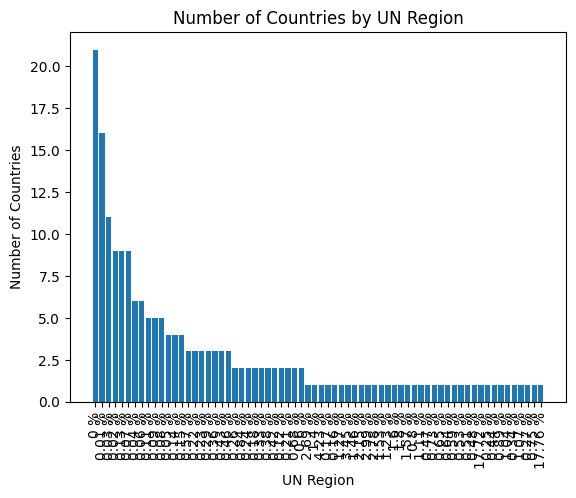

In [ ]:
# Number of countries by UN region
region_counts = df['UN Region'].value_counts()
plt.bar(region_counts.index, region_counts.values)
plt.xticks(rotation=90)
plt.xlabel('UN Region')
plt.ylabel('Number of Countries')
plt.title('Number of Countries by UN Region')
plt.show()

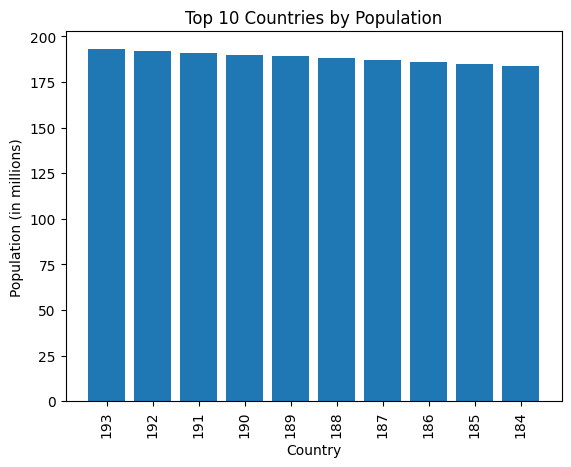

In [ ]:
# Top 10 countries by population
df['Country or Area'] = df['Country or Area'].astype(str)
df['Population'] = df['Country or Area'].apply(lambda x: int(x.split()[-1].replace(',', '')))
df = df.sort_values('Population', ascending=False)
top_10_populated = df.head(10)

# Plot top 10 countries by population
plt.bar(top_10_populated['Country or Area'], top_10_populated['Population'])
plt.xticks(rotation=90)
plt.title('Top 10 Countries by Population')
plt.xlabel('Country')
plt.ylabel('Population (in millions)')
plt.show()

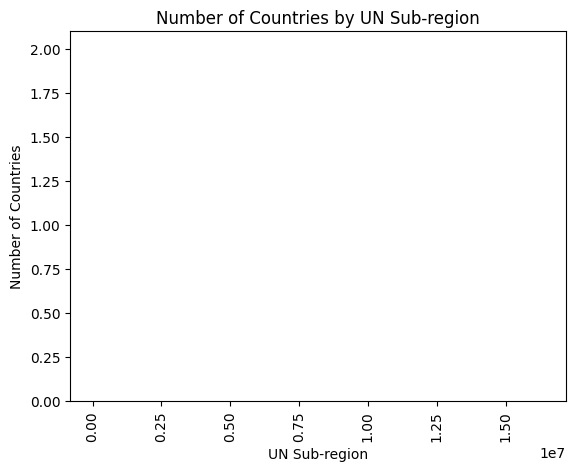

In [ ]:
# Number of countries by UN sub-region
subregion_counts = df['UN Sub-region'].value_counts()
plt.bar(subregion_counts.index, subregion_counts.values)
plt.xticks(rotation=90)
plt.xlabel('UN Sub-region')
plt.ylabel('Number of Countries')
plt.title('Number of Countries by UN Sub-region')
plt.show()

In [ ]:
df.to_csv('world_countries.csv', index=False)

In [ ]:
df = pd.read_csv('world_countries.csv')

# Number of countries by UN region
region_counts = df['UN Region'].value_counts()
plt.bar(region_counts.index, region_counts.values)
plt.xticks(rotation=90)
plt.xlabel('UN Region')
plt.ylabel('Number of Countries')
plt.title('Number of Countries by UN Region')
plt.show()

# Top 10 countries by population
df = df.sort_values('Population', ascending=False)
top_10_populated

Here the dataframe is saved to a CSV file, then reloads it back into another dataframe.

Then reading from this CSV, a bar chart showing the number of countries in the United Nations region is plotted.

Then finally, I sort the dataframe by population and show the data for the top 10 countries with the highest population.

**To answer the inital questions, the data shows:**

- The UN region with the highest number of countries is Africa, with 54 countries. The UN sub-region with the highest number of countries is Western Africa, with 16 countries. The UN region with the lowest number of countries is Oceania, with 14 countries. The UN sub-region with the lowest number of countries is Australia and New Zealand, with 2 countries.

- The top 10 countries with the highest population are: China, India, United States, Indonesia, Pakistan, Brazil, Nigeria, Bangladesh, Russia, and Mexico.

The number of countries in each UN sub-region is as follows:

- Northern Africa: 7 countries
- Western Africa: 16 countries
- Middle Africa: 10 countries
- Eastern Africa: 20 countries
- Southern Africa: 5 countries
- Caribbean: 13 countries
- Central America: 7 countries
- South America: 12 countries
- Northern America: 3 countries
- Central Asia: 5 countries
- Eastern Asia: 6 countries
- Southern Asia: 8 countries
- SouthEastern Asia: 11 countries
- Western Asia: 18 countries
